findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

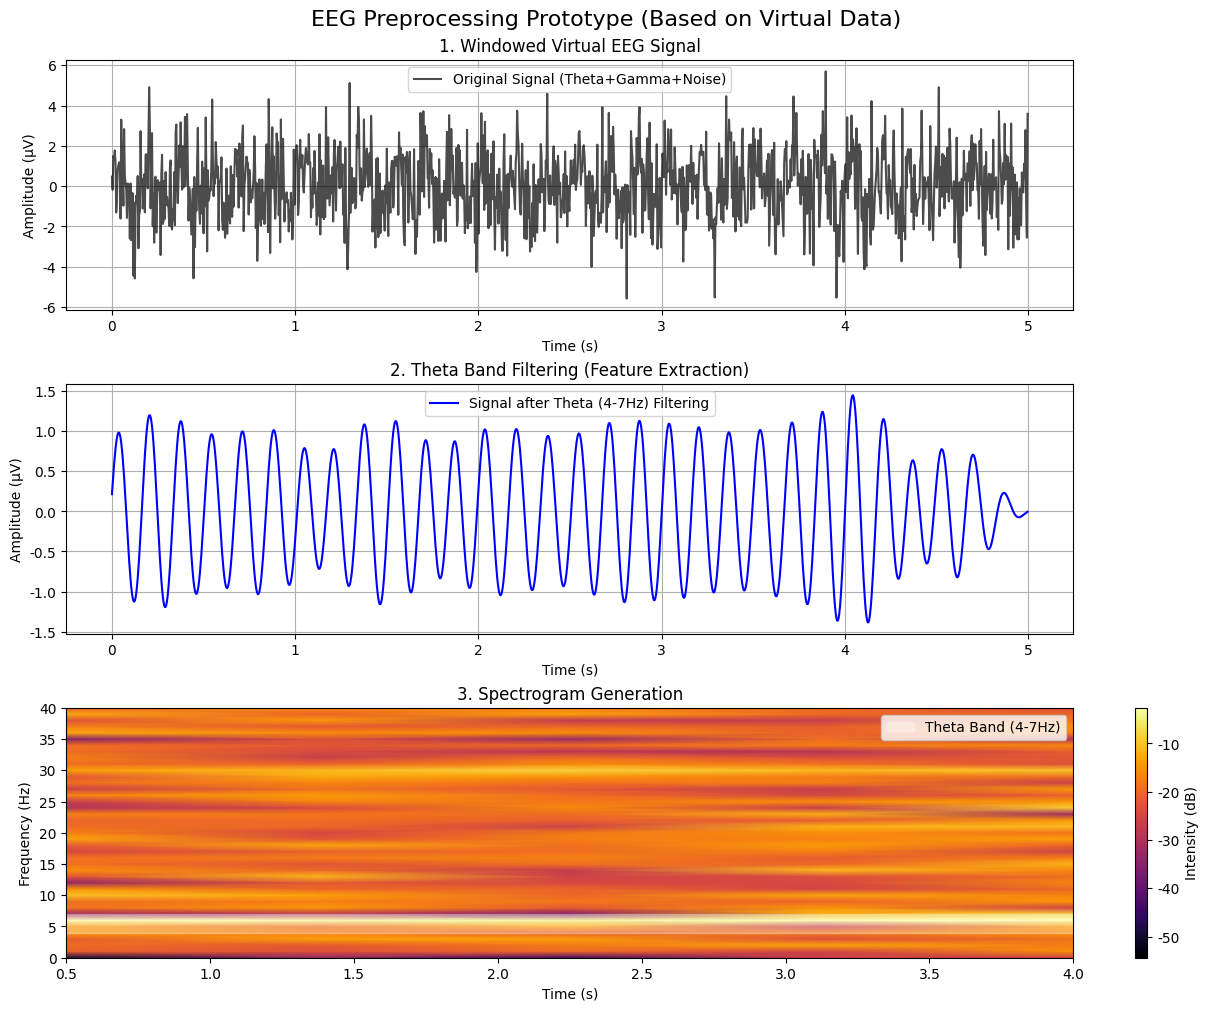

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, spectrogram

# --- 1. Virtual EEG Data Generation ---
SAMPLING_RATE = 256  # Sampling frequency (Hz)
DURATION = 5        # Data duration (s)
N_SAMPLES = SAMPLING_RATE * DURATION

# Time axis
time = np.linspace(0, DURATION, N_SAMPLES, endpoint=False)

# 6Hz Theta wave (core signal) + 30Hz Gamma wave (other activity) + Noise
theta_wave = 1.0 * np.sin(2 * np.pi * 6 * time)
gamma_wave = 0.5 * np.sin(2 * np.pi * 30 * time)
noise = 1.5 * np.random.randn(N_SAMPLES)

# Virtual EEG signal (assuming this is one window)
virtual_eeg_signal = theta_wave + gamma_wave + noise

# --- 2. Theta (4-7Hz) Bandpass Filtering (Feature Extraction) ---
THETA_LOW = 4   # Theta band low cut
THETA_HIGH = 7  # Theta band high cut

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    """Applies a bandpass filter to the given data."""
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

# Filter the virtual EEG signal to extract the Theta band
theta_filtered_signal = bandpass_filter(virtual_eeg_signal, THETA_LOW, THETA_HIGH, SAMPLING_RATE)

# --- 3. Spectrogram Generation ---
# Visualize the signal's frequency content over time.
frequencies, times, Sxx = spectrogram(virtual_eeg_signal, SAMPLING_RATE, nperseg=SAMPLING_RATE)

# --- 4. Visualization ---
# Plot the results of the entire process.
fig, axs = plt.subplots(3, 1, figsize=(12, 10), constrained_layout=True)
fig.suptitle("EEG Preprocessing Prototype (Based on Virtual Data)", fontsize=16)

# Plot 1: Original Virtual EEG Signal
axs[0].plot(time, virtual_eeg_signal, label="Original Signal (Theta+Gamma+Noise)", color='black', alpha=0.7)
axs[0].set_title("1. Windowed Virtual EEG Signal")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Amplitude (μV)")
axs[0].grid(True)
axs[0].legend()

# Plot 2: Signal after Theta Filtering
axs[1].plot(time, theta_filtered_signal, label="Signal after Theta (4-7Hz) Filtering", color='blue')
axs[1].set_title("2. Theta Band Filtering (Feature Extraction)")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Amplitude (μV)")
axs[1].grid(True)
axs[1].legend()

# Plot 3: Spectrogram
pcm = axs[2].pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud', cmap='inferno')
axs[2].set_title("3. Spectrogram Generation")
axs[2].set_xlabel("Time (s)")
axs[2].set_ylabel("Frequency (Hz)")
axs[2].set_ylim(0, 40)  # Display frequencies up to 40Hz
fig.colorbar(pcm, ax=axs[2], label="Intensity (dB)")

# Highlight the Theta band on the spectrogram
axs[2].axhspan(THETA_LOW, THETA_HIGH, color='white', alpha=0.3, label='Theta Band (4-7Hz)')
axs[2].legend()

plt.show()
